#  By Himanshu Jain
# Lets Grow More Internship Program

#### Topic : Exploratory Data Analysis
#### Dataset : Global Terrorism
#### Dataset link : https://www.canva.com/design/DAEjrwWV35w/-gxHUkJMO1Zr4pYVVpOYcg/view?utm_content=DAEjrwWV35w&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton#15


# Importing Libraries

In [3]:
import pandas as pd 
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# Reading Dataset

In [4]:
df=pd.read_csv("terrorism.csv",encoding='latin1')
pd.set_option('max_columns', None)
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


In [5]:
for i in df.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

# Renaming columns

In [6]:
df.rename(columns={'iyear':'Year',"imonth":'Month',"iday":"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
                  "longitude":'longitude',"summary":"summary","attacktype1_txt":"Attacktype","targtype1_txt":"Target_type","weaptype1_txt":"Weapontype","nkill":"Killed","nwound":"Wounded"},inplace=True)
df["Casualties"]=df.Killed+df.Wounded

In [7]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)

In [8]:
df=df[['Year','Month',"Day",'Group','Country','Region','State','City','latitude','longitude',"summary","Attacktype",
      "Target_type","Weapontype","Killed","Wounded","Casualties"]]
df.head(10)



Year  Month  Day                               Group             Country  \
0  1970      7    2                              MANO-D  Dominican Republic   
1  1970      0    0  23rd of September Communist League              Mexico   
2  1970      1    0                             Unknown         Philippines   
3  1970      1    0                             Unknown              Greece   
4  1970      1    0                             Unknown               Japan   
5  1970      1    1                  Black Nationalists       United States   
6  1970      1    2                 Tupamaros (Uruguay)             Uruguay   
7  1970      1    2                             Unknown       United States   
8  1970      1    2                     New Year's Gang       United States   
9  1970      1    3                     New Year's Gang       United States   

                        Region       State           City   latitude  \
0  Central America & Caribbean         NaN  Santo Domingo  18.456792   
1                North America     Federal    Mexico city  19.371887   
2               Southeast Asia      Tarlac        Unknown  15.478598   
3               Western Europe      Attica         Athens  37.997490   
4                    East Asia     Fukouka        Fukouka  33.580412   
5                North America    Illinois          Cairo  37.005105   
6                South America  Montevideo     Montevideo -34.891151   
7                North America  California        Oakland  37.791927   
8                North America   Wisconsin        Madison  43.076592   
9                North America   Wisconsin        Madison  43.072950   

    longitude                                            summary  \
0  -69.951164                                                NaN   
1  -99.086624                                                NaN   
2  120.599741                                                NaN   
3   23.762728                                                NaN   
4  130.396361                                                NaN   
5  -89.176269  1/1/1970: Unknown African American assailants ...   
6  -56.187214                                                NaN   
7 -122.225906  1/2/1970: Unknown perpetrators detonated explo...   
8  -89.412488  1/2/1970: Karl Armstrong, a member of the New ...   
9  -89.386694  1/3/1970: Karl Armstrong, a member of the New ...   

                       Attacktype                  Target_type  Weapontype  \
0                   Assassination  Private Citizens & Property     Unknown   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)     Unknown   
2                   Assassination          Journalists & Media     Unknown   
3               Bombing/Explosion      Government (Diplomatic)  Explosives   
4  Facility/Infrastructure Attack      Government (Diplomatic)  Incendiary   
5                   Armed Assault                       Police    Firearms   
6                   Assassination                       Police    Firearms   
7               Bombing/Explosion                    Utilities  Explosives   
8  Facility/Infrastructure Attack                     Military  Incendiary   
9  Facility/Infrastructure Attack         Government (General)  Incendiary   

   Killed  Wounded  Casualties  
0     1.0      0.0         1.0  
1     0.0      0.0         0.0  
2     1.0      0.0         1.0  
3     0.0      0.0         NaN  
4     0.0      0.0         NaN  
5     0.0      0.0         0.0  
6     0.0      0.0         0.0  
7     0.0      0.0         0.0  
8     0.0      0.0         0.0  
9     0.0      0.0         0.0

# knowing the shape for selected dataframe 

In [9]:
df.shape

(181691, 17)

# missing value statistic

In [10]:
df.isnull().sum()

Year               0
Month              0
Day                0
Group              0
Country            0
Region             0
State            421
City             434
latitude        4556
longitude       4557
summary        66129
Attacktype         0
Target_type        0
Weapontype         0
Killed             0
Wounded            0
Casualties     16874
dtype: int64

# Knowing data type of each column

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  summary      115562 non-null  object 
 11  Attacktype   181691 non-null  object 
 12  Target_type  181691 non-null  object 
 13  Weapontype   181691 non-null  object 
 14  Killed       181691 non-null  float64
 15  Wounded      181691 non-null  float64
 16  Casualties   164817 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage: 23.6+ MB


# Data_Report Using pandas profilling

In [9]:
df.profile_report()

# Visualizing The Data

## Year Wise Attack

In [12]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index('Year')
attacks.head()

Attacks
Year         
1970      651
1971      471
1972      568
1973      473
1974      581

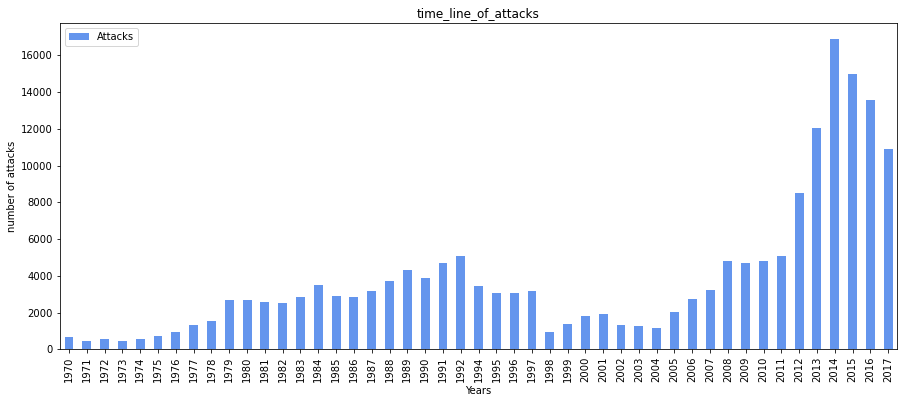

In [13]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("time_line_of_attacks")
plt.xlabel("Years")
plt.ylabel("number of attacks")
plt.show()

In [14]:
yc=df[["Year","Casualties"]].groupby("Year").sum()
yc.head()

Casualties
Year            
1970       367.0
1971       119.0
1972       602.0
1973       621.0
1974      1122.0

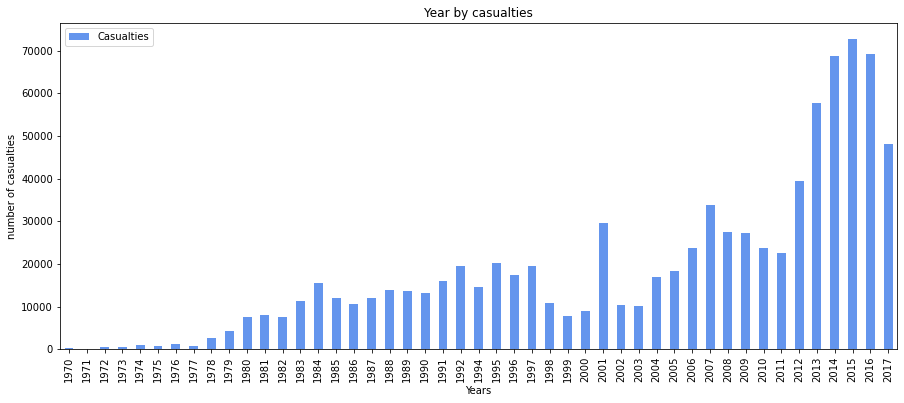

In [15]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year by casualties")
plt.xlabel("Years")
plt.ylabel("number of casualties")
plt.show()

In [16]:
yk=df.groupby("Year")["Killed"].sum()
yk.head()

Year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: Killed, dtype: float64

In [17]:
yw=df.groupby("Year")["Wounded"].sum()
yw.head()

Year
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0
Name: Wounded, dtype: float64

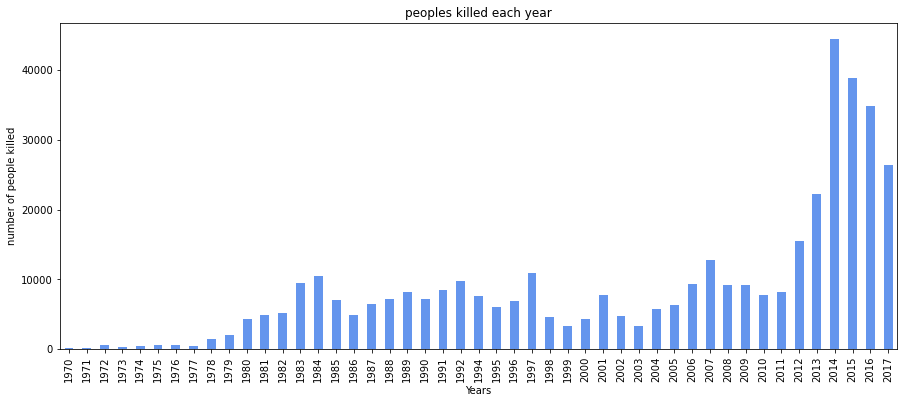

In [18]:
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("peoples killed each year")
plt.xlabel("Years")
plt.ylabel("number of people killed")
plt.show()

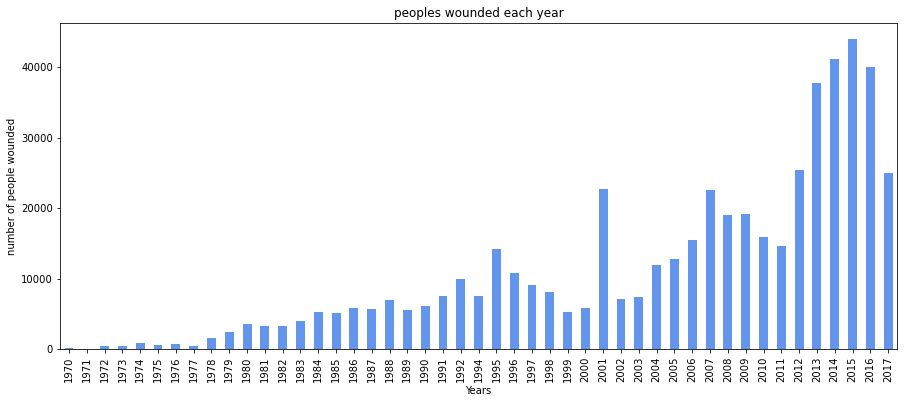

In [19]:
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("peoples wounded each year")
plt.xlabel("Years")
plt.ylabel("number of people wounded")
plt.show()

# Region Wise Attacks

In [20]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
Year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                           
1970            2              12                          28            472   
1971            1               5                          55            247   
1972            0               1                          53             73   
1973            2               1                          19             64   
1974            4               2                          42            111   

Region  South America  South Asia  Southeast Asia  Sub-Saharan Africa  \
Year                                                                    
1970               65           1              10                   3   
1971               24           0               6                   2   
1972               33           1              16                   4   
1973               83           1               2                   4   
1974               81           2               3                   7   

Region  Western Europe  
Year                    
1970                50  
1971               125  
1972               376  
1973               290  
1974               317

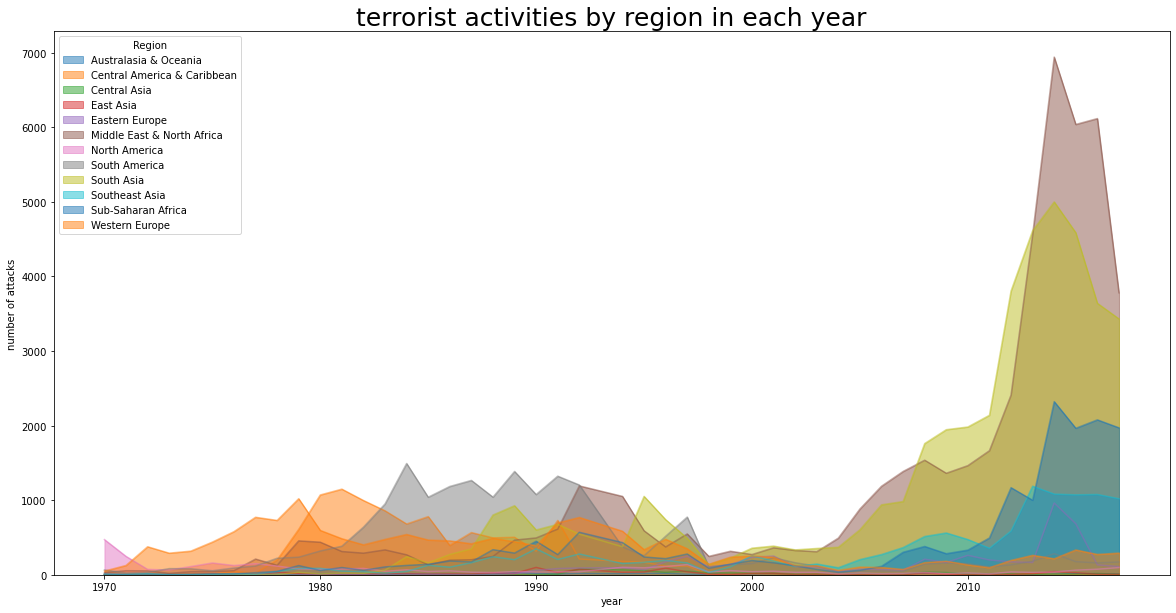

In [21]:
reg.plot(kind="area",stacked=False,figsize=(20,10))
plt.title('terrorist activities by region in each year',fontsize=25)
plt.xlabel("year")
plt.ylabel('number of attacks')
plt.show()

In [22]:
regt=reg.transpose()
regt['Total']=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

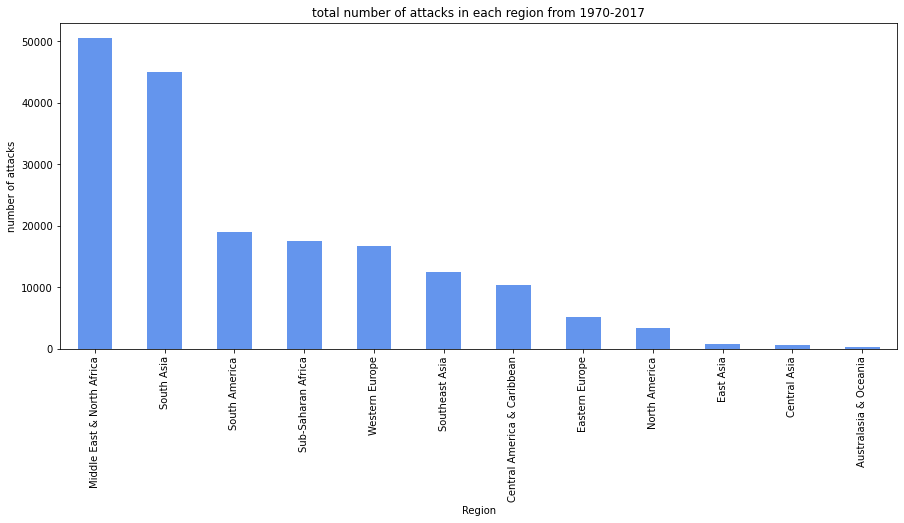

In [23]:
ra.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("total number of attacks in each region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("number of attacks")
plt.show()

In [24]:
rc=df[["Region","Casualties"]].groupby("Region").sum().sort_values(by="Casualties",ascending=False)
rc

Casualties
Region                                 
Middle East & North Africa     329807.0
South Asia                     234366.0
Sub-Saharan Africa             108990.0
South America                   43562.0
Southeast Asia                  40841.0
Central America & Caribbean     34530.0
North America                   26398.0
Western Europe                  22778.0
Eastern Europe                  18239.0
East Asia                       10003.0
Central Asia                     2969.0
Australasia & Oceania             409.0

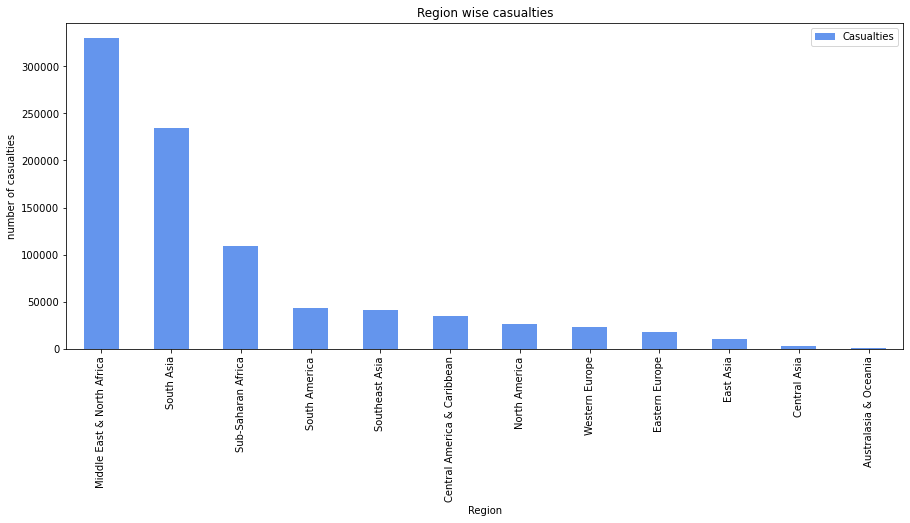

In [25]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise casualties")
plt.xlabel("Region")
plt.ylabel("number of casualties")
plt.show()

In [26]:
rk=df[["Region",'Killed']].groupby('Region').sum().sort_values(by="Killed",ascending=False)
rk

Killed
Region                               
Middle East & North Africa   137642.0
South Asia                   101319.0
Sub-Saharan Africa            78386.0
South America                 28849.0
Central America & Caribbean   28708.0
Southeast Asia                15637.0
Eastern Europe                 7415.0
Western Europe                 6694.0
North America                  4916.0
East Asia                      1152.0
Central Asia                   1000.0
Australasia & Oceania           150.0

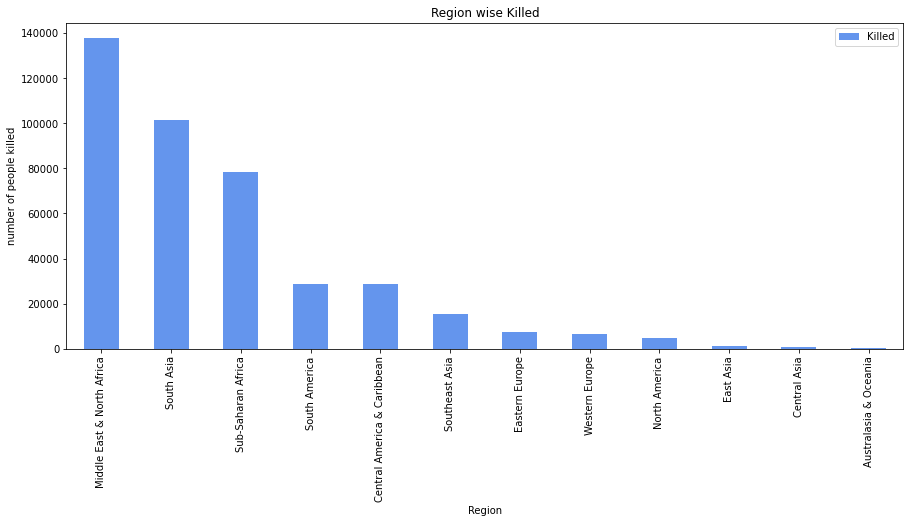

In [29]:
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Killed")
plt.xlabel("Region")
plt.ylabel("number of people killed")
plt.show()

In [28]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

Wounded
Region                               
Middle East & North Africa   214308.0
South Asia                   141360.0
Sub-Saharan Africa            52857.0
Southeast Asia                26259.0
North America                 21531.0
Western Europe                18332.0
South America                 16704.0
Eastern Europe                12045.0
East Asia                      9213.0
Central America & Caribbean    8991.0
Central Asia                   2009.0
Australasia & Oceania           260.0

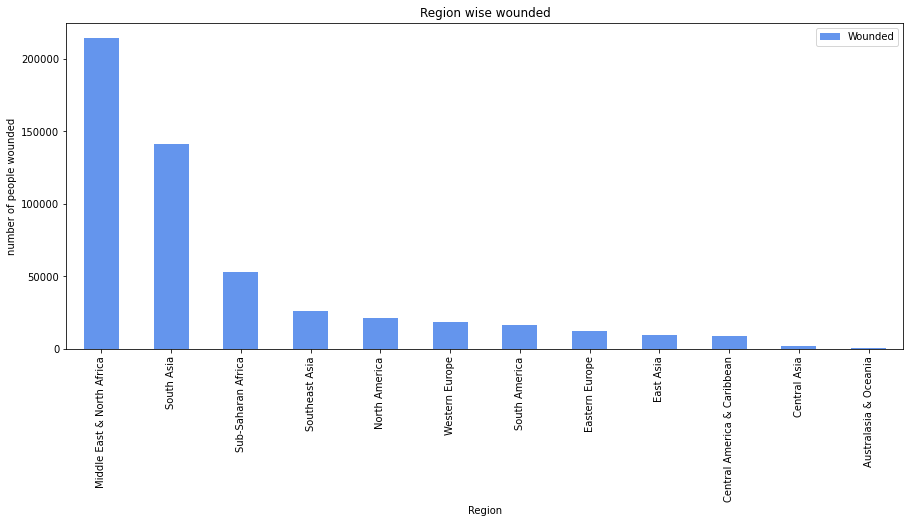

In [30]:
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise wounded")
plt.xlabel("Region")
plt.ylabel("number of people wounded")
plt.show()

# Country Wise Attacks

In [31]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

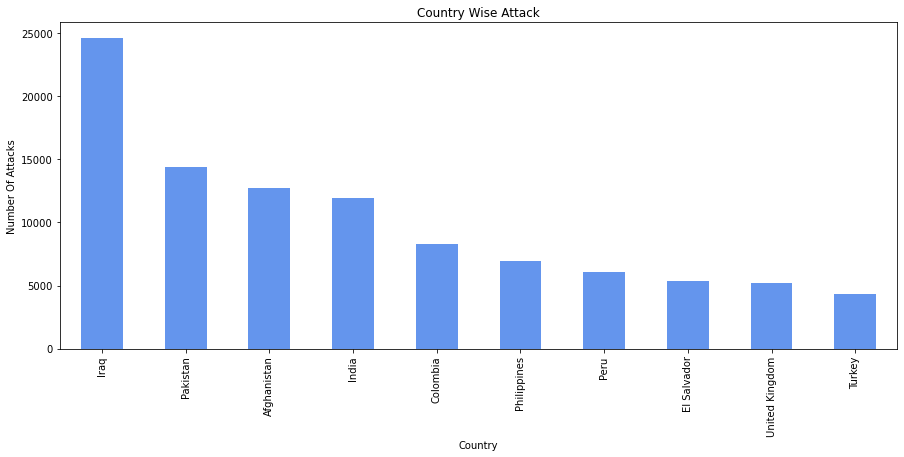

In [32]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Attack")
plt.xlabel("Country")
plt.ylabel("Number Of Attacks")
plt.show()

In [38]:
cnc=df[["Country","Casualties"]].groupby("Country").sum().sort_values(by="Casualties",ascending=False)
cnc.head(10)

Casualties
Country                  
Iraq             202982.0
Afghanistan       80213.0
Pakistan          64427.0
India             47108.0
Sri Lanka         29792.0
United States     24469.0
Colombia          23767.0
Philippines       22361.0
Nigeria           21728.0
Syria             21614.0

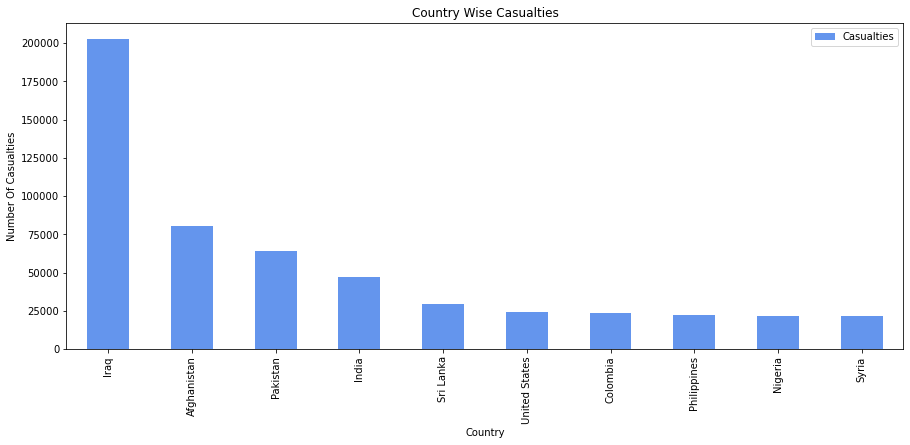

In [39]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Casualties")
plt.xlabel("Country")
plt.ylabel("Number Of Casualties")
plt.show()

In [41]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

Killed
Country             
Iraq         78589.0
Afghanistan  39384.0
Pakistan     23822.0
Nigeria      22682.0
India        19341.0
Sri Lanka    15530.0
Syria        15229.0
Colombia     14698.0
Peru         12771.0
El Salvador  12053.0

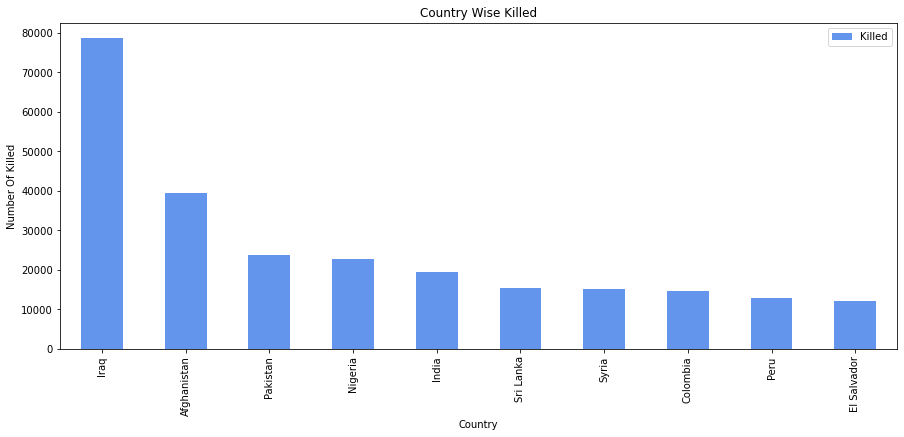

In [43]:
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wise Killed")
plt.xlabel("Country")
plt.ylabel("Number Of Killed")
plt.show()

In [44]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

Wounded
Country                
Iraq           134690.0
Afghanistan     44277.0
Pakistan        42038.0
India           28980.0
United States   20702.0
Sri Lanka       15561.0
Syria           14109.0
Philippines     13367.0
Lebanon         10904.0
Colombia        10328.0

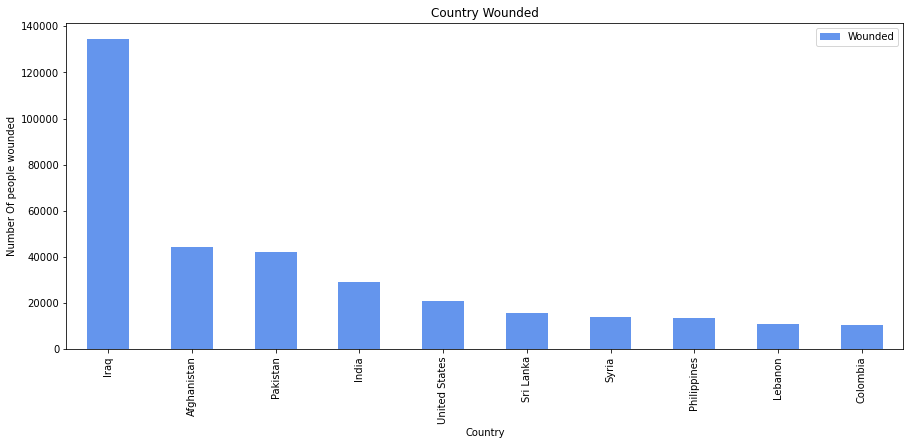

In [45]:
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country Wounded")
plt.xlabel("Country")
plt.ylabel("Number Of people wounded")
plt.show()

### Hence Iraq is the country which is hotspot for terrorist activities as Iraq is the most attacked country

# Terrorist Group Wise Attacks

In [56]:
grp=df["Group"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

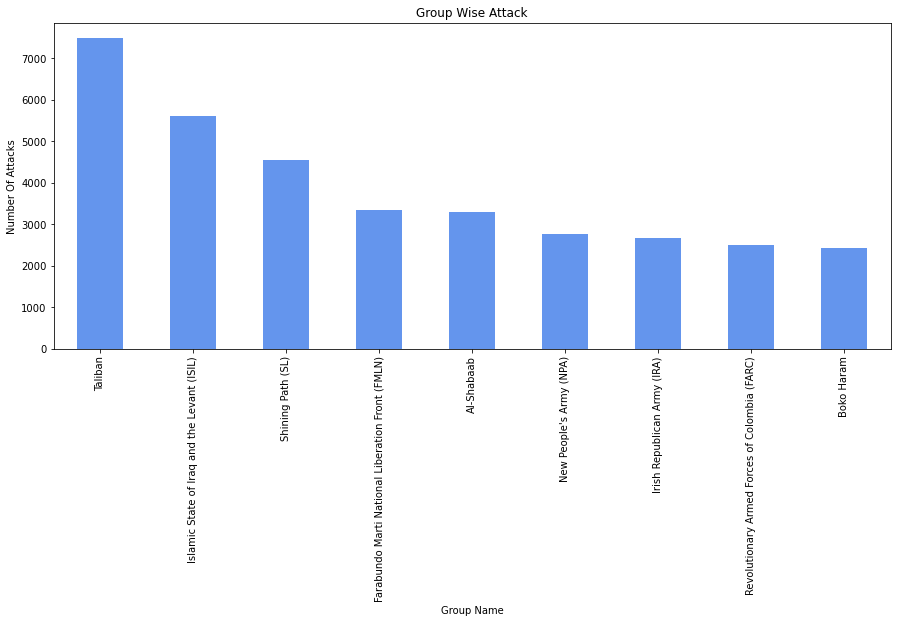

In [57]:
grp[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group Wise Attack")
plt.xlabel("Group Name")
plt.ylabel("Number Of Attacks")
plt.show()

# Attack Type Wise Attack

In [59]:
at=df["Attacktype"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

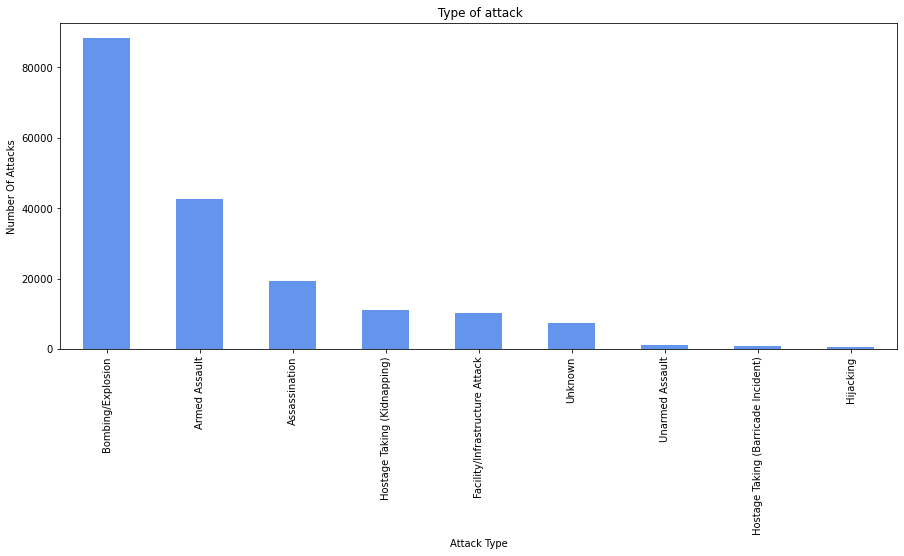

In [60]:
at[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title(" Type of attack")
plt.xlabel("Attack Type")
plt.ylabel("Number Of Attacks")
plt.show()

# Group + Country wise :

In [61]:
gca=df[["Group","Country"]].value_counts().drop("Unknown")
gca.head(10)

Group                                             Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

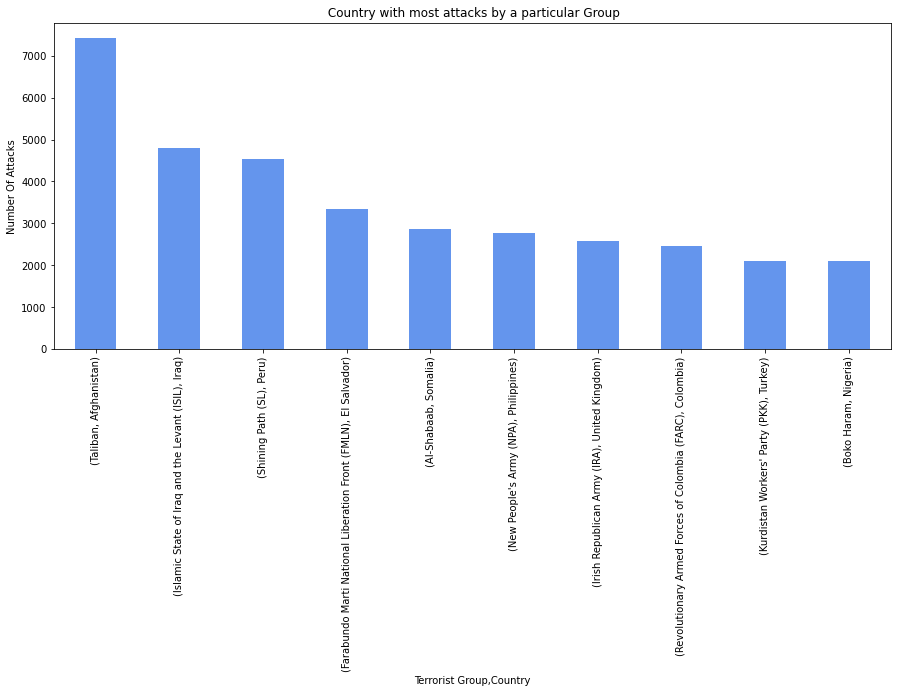

In [63]:
gca[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title(" Country with most attacks by a particular Group")
plt.xlabel("Terrorist Group,Country")
plt.ylabel("Number Of Attacks")
plt.show()

# weapon wise Attacks

In [48]:
wp=df["Weapontype"].value_counts()
wp.head(10)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapontype, dtype: int64

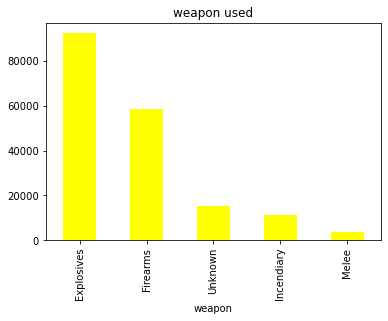

In [52]:
wp[:5].plot(kind="bar",color="yellow")
plt.title("weapon used")
plt.xlabel("weapon")
plt.show()

## Humanity Affected (World_Wide) by Terrorist Attacks from 1970 to 2017

In [68]:
casualties_worldwide=df["Casualties"].sum()
print("Total Number Of Casualties due to Terrorist Attacks from 1970 to 2017  across the World :\n",casualties_worldwide)

Total Number Of Casualties due to Terrorist Attacks from 1970 to 2017  across the World :
 872892.0


In [72]:
kill=df["Killed"].sum()
print("Total Number Of people killed due to Terrorist Attacks from 1970 to 2017  across the World :\n",kill)

Total Number Of people killed due to Terrorist Attacks from 1970 to 2017  across the World :
 411868.0


In [73]:
wound=df["Wounded"].sum()
print("Total Number Of people Wounded due to Terrorist Attacks from 1970 to 2017  across the World :\n",wound)

Total Number Of people Wounded due to Terrorist Attacks from 1970 to 2017  across the World :
 523869.0


# HotZone For Terrorist Activities:
### Iraq is the most attacked country world_wide across the globe